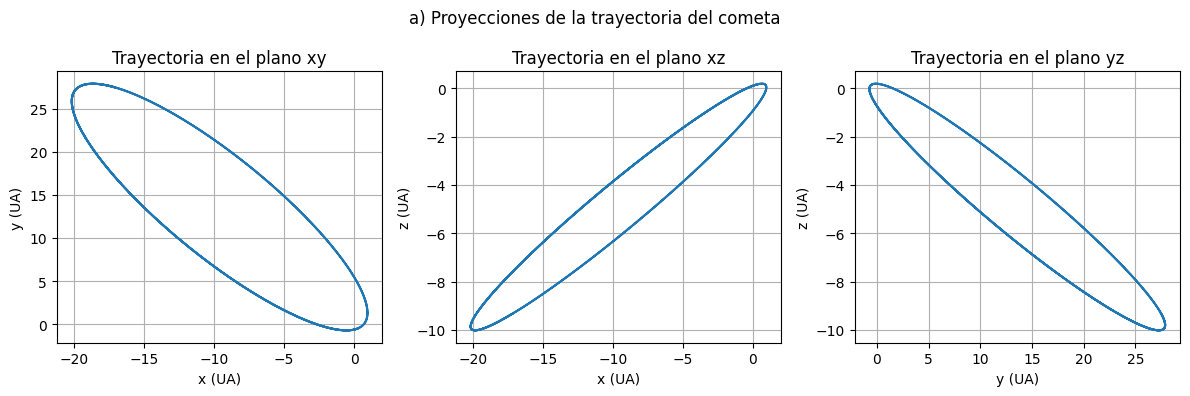

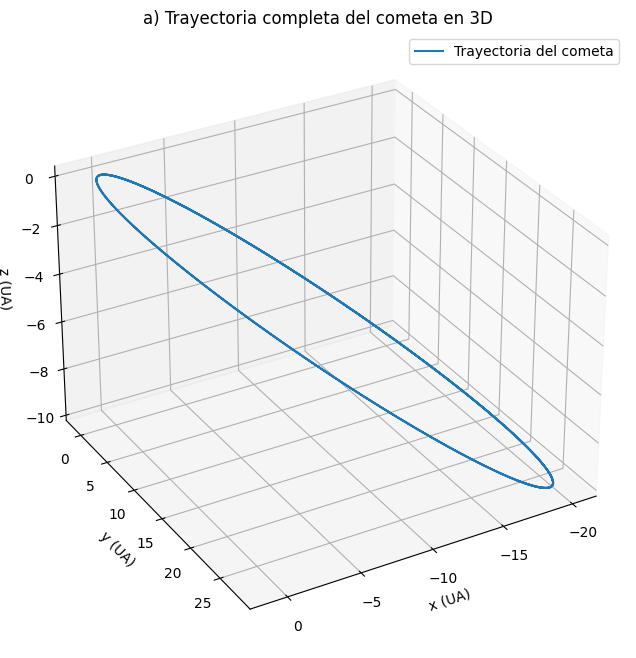

b) Estimaciones para el cometa Halley:
Posición en 2086 (t = 100 años): [-19.84490276  23.56364952  -9.38239428]
Velocidad en 2086 (t = 100 años): [-0.12434545  0.47169782 -0.11356382]
Posición en 2186 (t = 200 años): [-17.15490663  27.47483738  -9.31161824]
Velocidad en 2186 (t = 200 años): [ 0.32643984 -0.14795328  0.11382631]


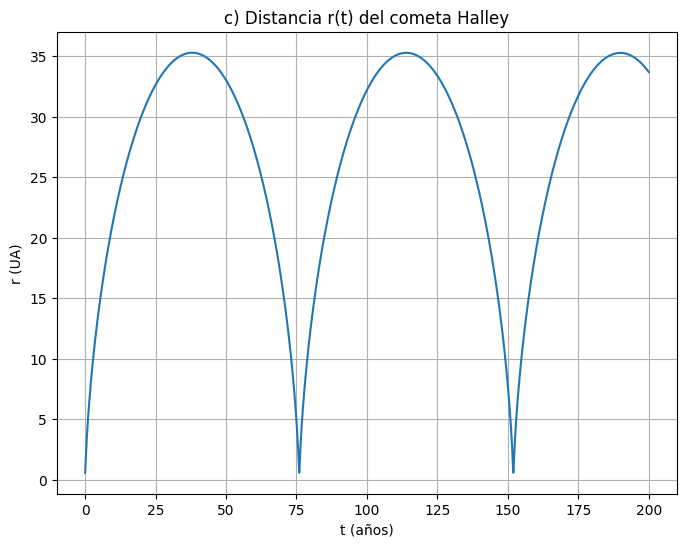

Período estimado de repetición del cometa: 75.97000000000001 años


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from mpl_toolkits.mplot3d import Axes3D

# Definir el sistema de ecuaciones diferenciales
def system(t, y):
    x, y, z, vx, vy, vz = y
    mu = 4 * np.pi**2
    r = np.sqrt(x**2 + y**2 + z**2)

    # Ecuaciones del sistema
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = -mu * x / r**3
    dvydt = -mu * y / r**3
    dvzdt = -mu * z / r**3

    return np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])

# Método de Runge-Kutta de 4º orden para sistemas
def rk4_system(f, y0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)  # Asegura que el t_end esté incluido
    y_values = np.zeros((len(t_values), len(y0)))

    y = y0
    for i, t in enumerate(t_values):
        y_values[i] = y
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, y_values

# Condiciones iniciales (posición y velocidad)
p0 = [0.325514, -0.459460, 0.166229]  # x0, y0, z0
v0 = [-9.096111, -6.916686, -1.305721]  # vx0, vy0, vz0

# Parámetros de tiempo
t0 = 0  # tiempo inicial en años
t_end = 200  # tiempo final en años
h = 0.01  # paso de integración

# Combinar condiciones iniciales
y0 = p0 + v0

# Resolver el sistema
t, y = rk4_system(system, y0, t0, t_end, h)

# a) Graficar las proyecciones xy, xz y yz de la trayectoria del cometa
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(y[:, 0], y[:, 1])  # Proyección xy
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.title('Trayectoria en el plano xy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(y[:, 0], y[:, 2])  # Proyección xz
plt.xlabel('x (UA)')
plt.ylabel('z (UA)')
plt.title('Trayectoria en el plano xz')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(y[:, 1], y[:, 2])  # Proyección yz
plt.xlabel('y (UA)')
plt.ylabel('z (UA)')
plt.title('Trayectoria en el plano yz')
plt.grid(True)

plt.suptitle('a) Proyecciones de la trayectoria del cometa')
plt.tight_layout()
plt.show()

# a) Graficar la trayectoria completa del cometa en 3D con un ángulo personalizado
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria
ax.plot(y[:, 0], y[:, 1], y[:, 2], label='Trayectoria del cometa')

# Configurar los ángulos de vista
ax.view_init(elev=30, azim=60)  # Cambia estos valores para ajustar el ángulo

# Etiquetas y título
ax.set_xlabel('x (UA)')
ax.set_ylabel('y (UA)')
ax.set_zlabel('z (UA)')
ax.set_title('a) Trayectoria completa del cometa en 3D')
ax.legend()

plt.show()

# b) Estimar la posición y velocidad del cometa en 2086 (t = 100) y 2186 (t = 200)
# Verificamos que los índices estén dentro de los límites
idx_2086 = int(100 / h)
idx_2186 = int(200 / h)

# Obtener valores de posición y velocidad si los índices son válidos
if idx_2086 < len(t):
    pos_2086 = y[idx_2086, :3]  # x, y, z en 2086
    vel_2086 = y[idx_2086, 3:]  # vx, vy, vz en 2086
else:
    print("El índice para 2086 está fuera de los límites")

if idx_2186 < len(t):
    pos_2186 = y[idx_2186, :3]  # x, y, z en 2186
    vel_2186 = y[idx_2186, 3:]  # vx, vy, vz en 2186
else:
    print("El índice para 2186 está fuera de los límites")

print("b) Estimaciones para el cometa Halley:")
print(f"Posición en 2086 (t = 100 años): {pos_2086}")
print(f"Velocidad en 2086 (t = 100 años): {vel_2086}")
print(f"Posición en 2186 (t = 200 años): {pos_2186}")
print(f"Velocidad en 2186 (t = 200 años): {vel_2186}")

# c) Elaborar una gráfica de t contra r(t) y estimar el período de repetición de los ciclos del cometa
r = np.sqrt(y[:, 0]**2 + y[:, 1]**2 + y[:, 2]**2)

plt.figure(figsize=(8, 6))
plt.plot(t, r)
plt.xlabel('t (años)')
plt.ylabel('r (UA)')
plt.title('c) Distancia r(t) del cometa Halley')
plt.grid(True)
plt.show()

# Estimar el período de repetición
# Para estimar el período, podemos identificar los mínimos en la gráfica de r(t)
peaks, _ = find_peaks(-r)
periods = np.diff(t[peaks])

print(f"Período estimado de repetición del cometa: {periods.mean()} años")
